# DQ Guided Project: Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10) # preview the dataframe as imported

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
star_wars.columns # review the column names

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
# bool indexing to remove rows with NaN in RespondentID
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

In [4]:
# rename columns to more intuitive/useful names
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    'Unnamed: 4': "seen_2",
    'Unnamed: 5': "seen_3",
    'Unnamed: 6': "seen_4",
    'Unnamed: 7': "seen_5",
    'Unnamed: 8': "seen_6",
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2', 
    'Unnamed: 11': 'ranking_3', 
    'Unnamed: 12': 'ranking_4', 
    'Unnamed: 13': 'ranking_5', 
    'Unnamed: 14': 'ranking_6'
})

In [5]:
def bool_map(series, map_dict):
    map_dict[True] = True
    map_dict[False] = False
    return series.map(map_dict)

In [6]:
yn_cols = ['Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?']

yn_map = {"Yes": True, "No": False}

for col in yn_cols:
    star_wars[col] = bool_map(star_wars[col], yn_map)

star_wars.head() # reprint a few rows to check output

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Which movies have been seen the most?

In [7]:
seen_cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

seen_map = {
        "Star Wars: Episode I  The Phantom Menace": True,
        "Star Wars: Episode II  Attack of the Clones": True,
        "Star Wars: Episode III  Revenge of the Sith": True,
        "Star Wars: Episode IV  A New Hope": True,
        "Star Wars: Episode V The Empire Strikes Back": True,
        "Star Wars: Episode VI Return of the Jedi": True,
        np.NaN: False
    }

for col in seen_cols:
    star_wars[col] = bool_map(star_wars[col], seen_map)
    
star_wars.head() # reprint a few rows to check output

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now that we've cleaned up the data on which Star Wars movies respondents have seen, we can do some analysis on it. Let's look at the total view counts for each movie.

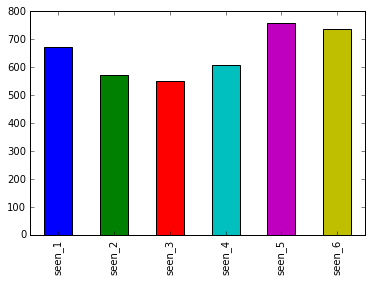

In [8]:
movie_views = star_wars[seen_cols].sum()
movie_views.plot.bar()

It's interesting to me that Episode V is actually the most viewed out of the group, as I would have expected it to be either Episode I or IV, since those are each the first out of their respective sub-trilogy. I'm also surprised at how close the results are between Ep I-III and IV-VI.
## Which of the movies are most popular?

In [20]:
rank_cols = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

# convert ranking cols to float to turn the movie rankings into interpretable numbers
star_wars[rank_cols] = star_wars[rank_cols].astype(float)
star_wars[rank_cols].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly.

In [21]:
rank_means = star_wars[rank_cols].mean()
rank_means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

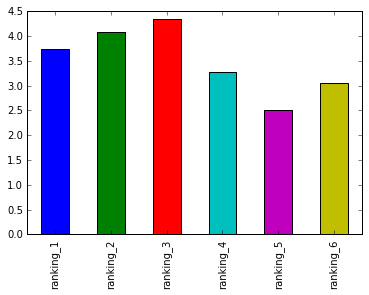

In [12]:
rank_means.plot.bar()

Having cleaned up the data for ranking episodes I - VI, we've now been able to visualize this as a bar chart. Based on user ratings, it would seem that the best Star Wars movie is episode V, then on to VI, IV, I, II, and III. Clearly the new versions have received a less warm reception. It's also interesting to compare this data back to the view-counts for each film. Other than episodes I and IV trading places for 3rd and 4th place, the rankings here are exactly in order from most to least viewed.

## Movie preferences by gender

In [13]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

male_views = males[seen_cols].sum()
female_views = females[seen_cols].sum()

gender_views = pd.concat({'Male Views': male_views, 'Female Views': female_views}, axis=1)
gender_views.head(6)

,Female Views,Male Views
seen_1,298,361
seen_2,237,323
seen_3,222,317
seen_4,255,342
seen_5,353,392
seen_6,338,387


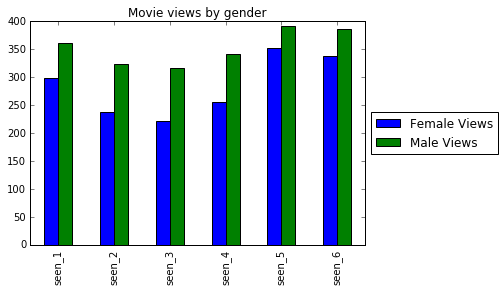

In [14]:
ax = gender_views.plot(kind='bar')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Movie views by gender')
plt.show()

In [24]:
male_ranks = males[rank_cols].mean()
female_ranks = females[rank_cols].mean()

gender_ranks = pd.concat({'Male Ranks': male_ranks, 'Female Ranks': female_ranks}, axis=1)
gender_ranks.head(6)

,Female Ranks,Male Ranks
ranking_1,3.429293,4.037825
ranking_2,3.954660,4.224586
ranking_3,4.418136,4.274882
ranking_4,3.544081,2.997636
ranking_5,2.569270,2.458629
ranking_6,3.078086,3.002364


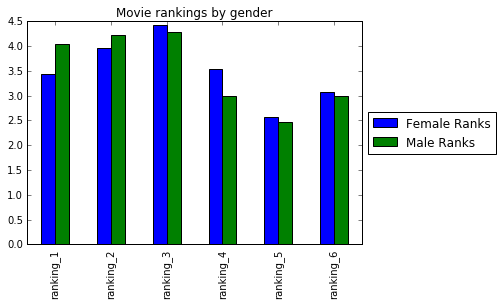

In [25]:
ax = gender_ranks.plot(kind='bar')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Movie rankings by gender')
plt.show()

Now having plotted the different view counts and rankings of the movies by gender we can make a few more observations. For one, unsurprisingly the Star Wars series is more popular with men than women, with that difference being most pronounced in episodes I-IV. In terms of ranking each film, the relative rankings are similar, but men definitely seem to more strongly prefer the original three films over the later three than women.